In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [2]:
np.random.seed(1)

y = np.concatenate((np.zeros(500),np.ones(500),np.ones(500)*2,np.ones(500)*3,np.ones(500)*4,
                    np.ones(500)*5,np.ones(500)*6,np.ones(500)*7,np.ones(500)*8,np.ones(500)*9))
#y = np.random.randint(0,3,6000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i)

0 500
1 500
2 500
3 500
4 500
5 500
6 500
7 500
8 500
9 500


In [3]:
x = np.zeros((n_points*10,5))

In [4]:
np.random.seed(1)
cov_mat = [[0.02,0,0,0,0],[0,0.02,0,0,0],[0,0,0.02,0,0],
                                                 [0,0,0,0.02,0],[0,0,0,0,0.02]]

x[idx[0],:] = np.random.multivariate_normal(mean = [1,0,0,0,0],
                                            cov=cov_mat,size=sum(idx[0]))


x[idx[1],:] = np.random.multivariate_normal(mean = [0,1,0,0,0],
                                            cov=cov_mat,size=sum(idx[1]))


x[idx[2],:] = np.random.multivariate_normal(mean = [0,0,1,0,0],
                                            cov=cov_mat,size=sum(idx[2]))


x[idx[3],:] = np.random.multivariate_normal(mean = [0,0,0,-0.75,0.5],
                                            cov=cov_mat,size=sum(idx[3]))



x[idx[4],:] = np.random.multivariate_normal(mean = [0,0,0,0.65,-0.65],
                                            cov=cov_mat,size=sum(idx[4]))


x[idx[5],:] = np.random.multivariate_normal(mean = [0,0,0,-0.9,-0.75],
                                            cov=cov_mat,size=sum(idx[5]))


x[idx[6],:] = np.random.multivariate_normal(mean = [0,0,0,0.8,-0.8],
                                            cov=cov_mat,size=sum(idx[6]))

x[idx[7],:] = np.random.multivariate_normal(mean = [0,0,0,-0.5,0.8],
                                            cov=cov_mat,size=sum(idx[7]))


x[idx[8],:] = np.random.multivariate_normal(mean = [0,0,0,0.9,0.75],
                                            cov=cov_mat,size=sum(idx[8]))


x[idx[9],:] = np.random.multivariate_normal(mean = [0,0,0,-1,0.65],
                                            cov=cov_mat,size=sum(idx[9]))




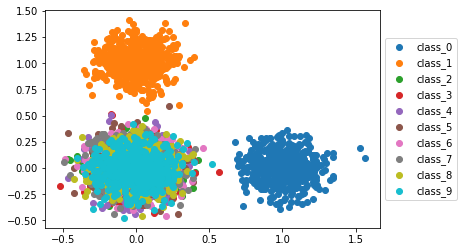

In [5]:
plt.scatter(x[idx[0],0],x[idx[0],1],label="class_"+str(0))

plt.scatter(x[idx[1],0],x[idx[1],1],label="class_"+str(1))



plt.scatter(x[idx[2],0],x[idx[2],1],label="class_"+str(2))


plt.scatter(x[idx[3],0],x[idx[3],1],label="class_"+str(3))



plt.scatter(x[idx[4],0],x[idx[4],1],label="class_"+str(4))


plt.scatter(x[idx[5],0],x[idx[5],1],label="class_"+str(5))


plt.scatter(x[idx[6],0],x[idx[6],1],label="class_"+str(6))


plt.scatter(x[idx[7],0],x[idx[7],1],label="class_"+str(7))


plt.scatter(x[idx[8],0],x[idx[8],1],label="class_"+str(8))


plt.scatter(x[idx[9],0],x[idx[9],1],label="class_"+str(9))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
mean_x = np.mean(x,axis=0,keepdims=True)
std_x = np.std(x,axis=0,keepdims=True)
x = ( x -  mean_x ) / std_x

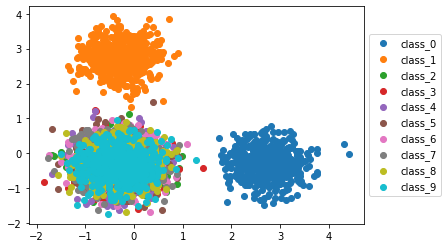

In [7]:
plt.scatter(x[idx[0],0],x[idx[0],1],label="class_"+str(0))

plt.scatter(x[idx[1],0],x[idx[1],1],label="class_"+str(1))



plt.scatter(x[idx[2],0],x[idx[2],1],label="class_"+str(2))


plt.scatter(x[idx[3],0],x[idx[3],1],label="class_"+str(3))



plt.scatter(x[idx[4],0],x[idx[4],1],label="class_"+str(4))


plt.scatter(x[idx[5],0],x[idx[5],1],label="class_"+str(5))


plt.scatter(x[idx[6],0],x[idx[6],1],label="class_"+str(6))


plt.scatter(x[idx[7],0],x[idx[7],1],label="class_"+str(7))


plt.scatter(x[idx[8],0],x[idx[8],1],label="class_"+str(8))


plt.scatter(x[idx[9],0],x[idx[9],1],label="class_"+str(9))


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
print(np.mean(x)),print(np.std(x))

1.3983481039758771e-16
0.9999999999999996


(None, None)

In [9]:
foreground_classes = {'class_0','class_1' }

background_classes = {'bg_classes',}

In [10]:
desired_num = 1100  # 2000 + 1000


m = 100



mosaic_list_of_images =[]
mosaic_label = []
fore_idx=[]
for j in tqdm(range(desired_num)):
    np.random.seed(j)
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,m)
    a = []
    for i in range(m):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_of_images.append(np.reshape(a,(m,5)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

100%|██████████████████████████████████████| 1100/1100 [00:02<00:00, 389.88it/s]


In [11]:
len(mosaic_list_of_images),mosaic_list_of_images[0].shape

(1100, (100, 5))

In [12]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

In [13]:
batch = 250
msd1 = MosaicDataset(mosaic_list_of_images[0:100], mosaic_label[0:100] , fore_idx[0:100])
train_loader = DataLoader( msd1 ,batch_size= batch ,shuffle=True) 


batch = 250
msd2 = MosaicDataset(mosaic_list_of_images[100:], mosaic_label[100:] , fore_idx[100:])
test_loader = DataLoader( msd2 ,batch_size= batch ,shuffle=False)

In [14]:
def my_cross_entropy(output,target,loss_criterion):
    
    
    batch = output.size(0)
    #print(batch)
    patches = output.size(1)
    classes = output.size(2)
    output = torch.reshape(output,(batch*patches,classes))    
    target = target.repeat_interleave(patches)
    
    loss = loss_criterion(output,target)
    #print(final_loss)
    return loss

In [15]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(5, 3)
    torch.nn.init.xavier_normal_(self.fc1.weight)
    torch.nn.init.zeros_(self.fc1.bias)
  def forward(self, x):
    x = self.fc1(x)
    # print(x.shape)
    return x

In [16]:
torch.manual_seed(12)
net = Net().double()
net = net.to(device)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)#, momentum=0.9)


In [18]:
acti = []
loss_curi = []

epochs  = 300
for epoch in range(epochs): # loop over the dataset multiple times
    ep_lossi = []

    running_loss = 0.0
    for i, data1 in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels,_ = data1
        #print(labels.shape)
        inputs = inputs.double()
        labels = labels.long()
        inputs, labels = inputs.to(device),labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print(outputs.shape,inputs.shape)
        loss = my_cross_entropy(outputs, labels,criterion)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        mini = 1
        if i % mini== (mini-1):    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / mini))
            ep_lossi.append(running_loss/mini) # loss per minibatch
            running_loss = 0.0
            
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch

    if(np.mean(ep_lossi)<=0.001):
      break
print('Finished Training')


[1,     1] loss: 1.590
[2,     1] loss: 1.575
[3,     1] loss: 1.559
[4,     1] loss: 1.545
[5,     1] loss: 1.530
[6,     1] loss: 1.516
[7,     1] loss: 1.503
[8,     1] loss: 1.489
[9,     1] loss: 1.476
[10,     1] loss: 1.464
[11,     1] loss: 1.452
[12,     1] loss: 1.440
[13,     1] loss: 1.428
[14,     1] loss: 1.417
[15,     1] loss: 1.406
[16,     1] loss: 1.396
[17,     1] loss: 1.385
[18,     1] loss: 1.375
[19,     1] loss: 1.365
[20,     1] loss: 1.356
[21,     1] loss: 1.346
[22,     1] loss: 1.337
[23,     1] loss: 1.328
[24,     1] loss: 1.319
[25,     1] loss: 1.310
[26,     1] loss: 1.302
[27,     1] loss: 1.293
[28,     1] loss: 1.285
[29,     1] loss: 1.277
[30,     1] loss: 1.270
[31,     1] loss: 1.262
[32,     1] loss: 1.255
[33,     1] loss: 1.248
[34,     1] loss: 1.241
[35,     1] loss: 1.234
[36,     1] loss: 1.228
[37,     1] loss: 1.222
[38,     1] loss: 1.215
[39,     1] loss: 1.210
[40,     1] loss: 1.204
[41,     1] loss: 1.198
[42,     1] loss: 1.193
[

In [19]:
correct = 0
total = 0
datx = []
labelsx = []
with torch.no_grad():
    for data in train_loader:
        images, labels,_ = data
        
        batch = images.size(0)
        patches = images.size(1)
        
        images = torch.reshape(images,(batch*patches,5))
        labels = labels.repeat_interleave(patches)
        datx.append(images)
        labelsx.append(labels)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        #print(predicted.shape)
        #print(labels.shape)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %d %%' % ( 100 * correct / total))

Accuracy of the network on the train images: 39 %


In [20]:
# datx = np.concatenate(datx,axis=0)
# labelsx = np.concatenate(labelsx,axis=0)
# print(datx.shape,labelsx.shape) 

In [21]:
np.random.seed(2)

y_test = np.concatenate((np.zeros(500),np.ones(500),np.ones(500)*2))
#y = np.random.randint(0,3,6000)
idx_t= []
for i in range(3):
    print(i,sum(y_test==i))
    idx_t.append(y_test==i)
x_test = np.zeros((1500,5))


np.random.seed(12)
x_test[idx_t[0],:] = np.random.multivariate_normal(mean = [1,0,0,0,0],
                                            cov=cov_mat,size=sum(idx_t[0]))
x_test[idx_t[1],:] =  np.random.multivariate_normal(mean = [0,1,0,0,0],
                                            cov=cov_mat,size=sum(idx_t[1]))
x_test[idx_t[2],:] = np.random.multivariate_normal(mean = [0,0,1,0,0],
                                            cov=cov_mat,size=sum(idx_t[2]))

0 500
1 500
2 500


In [22]:
x_test= (x_test - mean_x)/std_x


# for i in range(3):
#     plt.scatter(x_test[idx_t[i],0],x_test[idx_t[i],1],label="class_"+str(i))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))




In [23]:
x_test = torch.tensor(x_test).to(device)
outputs = net(x_test)
_, predicted = torch.max(outputs.data, 1)
print("Accuracy on True Data ", np.sum(predicted.cpu().numpy()  == y_test) /15,"%")

Accuracy on True Data  98.2 %
